---
title: Accessing Raw Simulation Results
description: How to access raw results in the BPTK-Py simulation framework.
keywords: agent-based modeling, abm, bptk, bptk-py, python
---

# How To: Accessing Raw Simulation Results

In some situations, it is helpful obtain the raw simulation results rather than the plot. To activate this feature, set the ``return_df`` flag to ``True``.

Below is example code that runs a scenario and sets ``return_df`` to true. This way it is possible to work with the data outside ``BPTK_Py``!

In [1]:
from BPTK_Py.bptk import bptk
bptk = bptk()

In [2]:
df = bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario120"], 
    equations=["openTasks"],
    title="Deadline changes\n",
    x_label="Time",start_date="1/1/2018",freq="M",
    y_label="Marketing Budget (USD)",
    kind="line",
    return_df=True ## <--- HERE
    ,series_names = {"smSimpleProjectManagement_scenario120_openTasks" : "openTasks"}
    )

The following code prints useful information by calling the ``head()`` and ``describe()`` functions of the dataFrame. Head return the first 5 elements and Describe gives some important information on the data.
For instance, we learn that there are 121 elements in the dataFrame ("count"). Further values are the mean, standard deviation, min, max, and the 25th / 50th and 75th percentile.

In [3]:
print("***************************")
print("Properties of the dataFrame")
print("\t first 5 elements:")
print(df.head())
print("")
print("Main description of the dataFrame")
print(df.describe())

***************************
Properties of the dataFrame
	 first 5 elements:
             openTasks
2018-01-31  120.000000
2018-02-28  118.904800
2018-03-31  117.809096
2018-04-30  116.712881
2018-05-31  115.616145

Main description of the dataFrame
        openTasks
count  121.000000
mean    53.582193
std     38.468884
min      0.000000
25%     18.411872
50%     53.185085
75%     86.886076
max    120.000000



To select only certain periods, two different approaches can be used. 
1. Use the list index representation
2. Use dates (if you created a time series using ``start_date``)

In both cases, the selected range is supplied  in square brackets:

In [4]:
# Select 06 first months
by_index = df[0:6] 

# Select all values of the months January to June 2018:
by_year = df["2018-01":"2018-06"]

print("BY INDEX")
print(by_index)

print("")
print("BY YEAR-MONTH:")
print(by_year)

print("")
print("CHECK FOR EQUALITY OF BOTH")
print(by_index == by_year)

BY INDEX
             openTasks
2018-01-31  120.000000
2018-02-28  118.904800
2018-03-31  117.809096
2018-04-30  116.712881
2018-05-31  115.616145
2018-06-30  114.518882

BY YEAR-MONTH:
             openTasks
2018-01-31  120.000000
2018-02-28  118.904800
2018-03-31  117.809096
2018-04-30  116.712881
2018-05-31  115.616145
2018-06-30  114.518882

CHECK FOR EQUALITY OF BOTH
            openTasks
2018-01-31       True
2018-02-28       True
2018-03-31       True
2018-04-30       True
2018-05-31       True
2018-06-30       True


This allows for versatile and easy analysis of the returned data. For example, equality testing using ``by_index == by_year``. The return type is a ``Series`` that may be used for further computation.
We will now simulate the equation "closedTasks" and generate a second dataFrame and append it to the existing dataFrame:

In [5]:
df_closed = bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario120"], 
    equations=["closedTasks"],
    title="Deadline changes\n",
    x_label="Time",start_date="1/1/2018",freq="M",
    y_label="Tasks",
    kind="line",
    return_df=True,
    series_names= {"smSimpleProjectManagement_scenario120_closedTasks":"closedTasks"}
    )


df["closedTasks"] = df_closed["closedTasks"]

This shows how easy it is to maniupulate series data. Similarly, we may create new series using computation:

In [6]:
df["initialOpenTasks"] = df["openTasks"] + df["closedTasks"]
print(df["initialOpenTasks"].head())

2018-01-31    120.0
2018-02-28    120.0
2018-03-31    120.0
2018-04-30    120.0
2018-05-31    120.0
Freq: M, Name: initialOpenTasks, dtype: float64


As you can see, the DataFrame handles all the heavy lifting and we can focus on high-level analysis.
Every value should now be 120, just like the initial number of tasks of the scenario ``scenario120``.
As the last example, we will now compute the percentage of tasks closed:

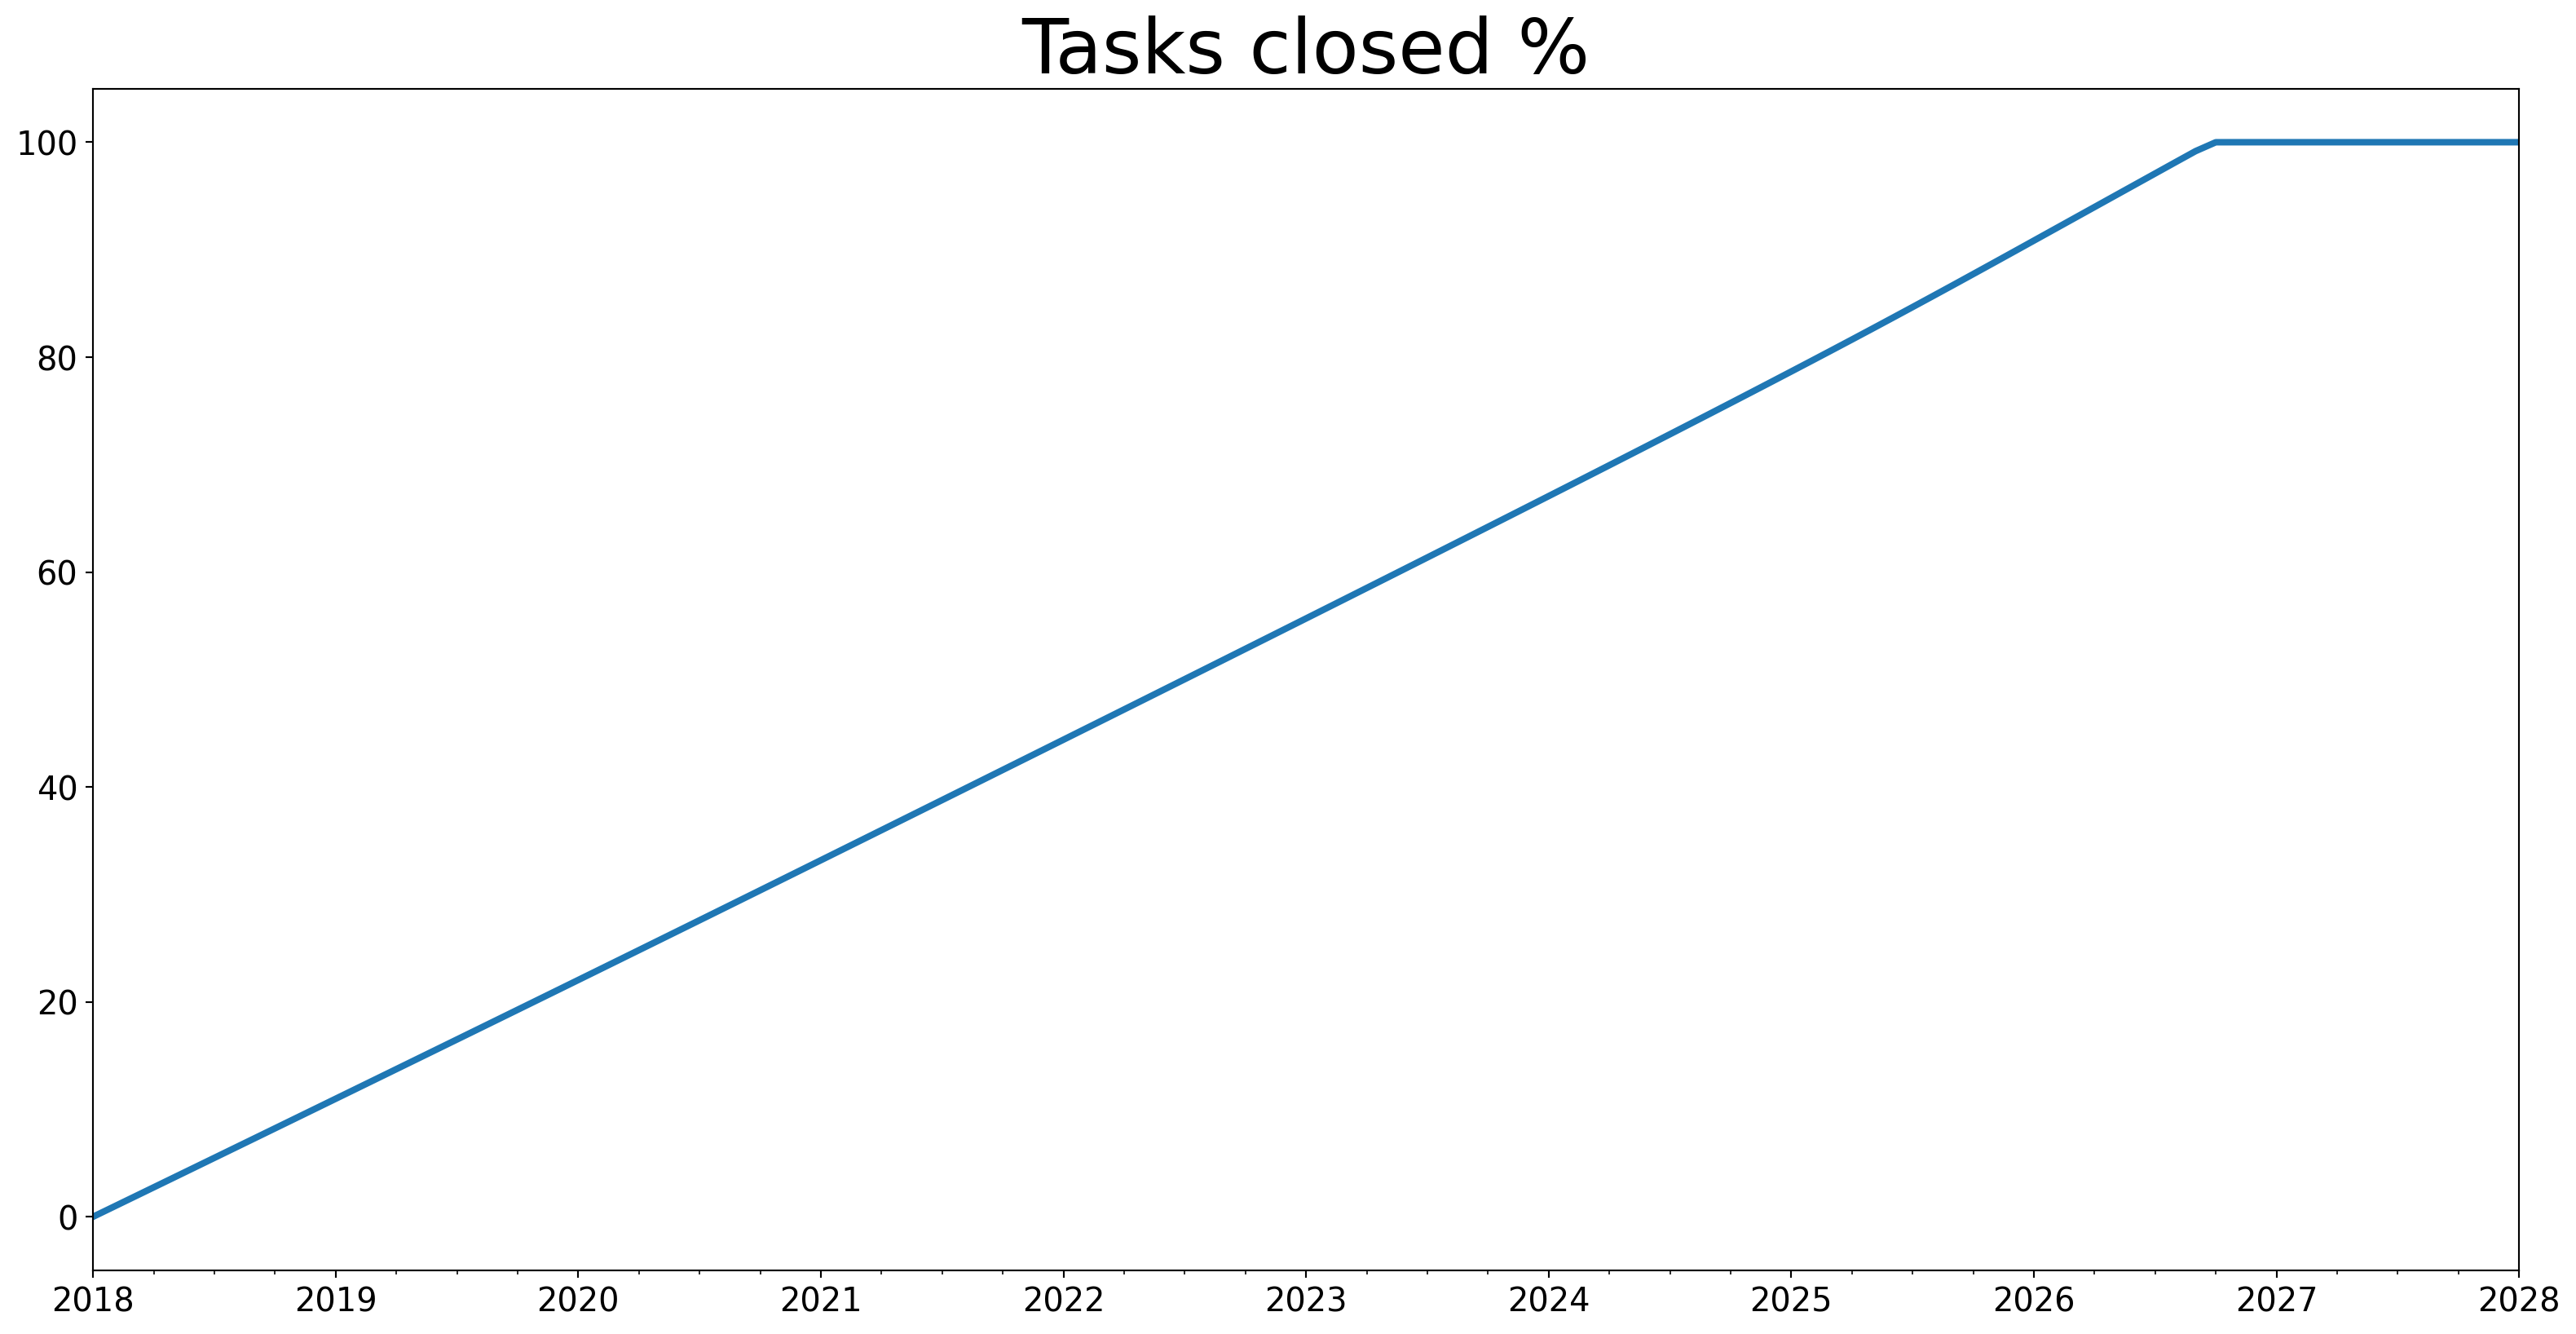

In [7]:
df["Percent Tasks Closed"] = df["closedTasks"] / df["initialOpenTasks"] * 100

### and plot it:
plt=df["Percent Tasks Closed"].plot(title="Tasks closed %",figsize=(20,10))